# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer
)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Overview

### Import data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DSBA/project04/INNHotelsGroup.csv')

In [4]:
df_copy = df.copy()

### Preview data

In [5]:
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [6]:
df.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270              167.80                       1   Not_Canceled  
36271               90.95                       2       Canceled  
36272               98.39                       2   Not_Canceled  
36273               94.50                       0       Canceled  
36274              161.67                       0   Not_Canceled

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* The dependent variable, booking_status, is a categorical variable.
* type_of_meal_plan, room_type_reserved, and market_segment_type are also categorical variables.
* Booking_ID is a string.
* The rest of the variables are integers, except for avg_price_per_room, which is a float.


### Check for duplicate data

In [8]:
df.duplicated().sum()

0

* There are no duplicates.

### Check for missing data

In [9]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

* There are no null values.

In [10]:
df.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

### Drop unneeded columns

We can drop Booking_ID as that is not needed in our analysis.


In [11]:
# drop column
df.drop('Booking_ID', axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Univariate Analysis

#### Observations on dates

<Axes: xlabel='arrival_year', ylabel='count'>

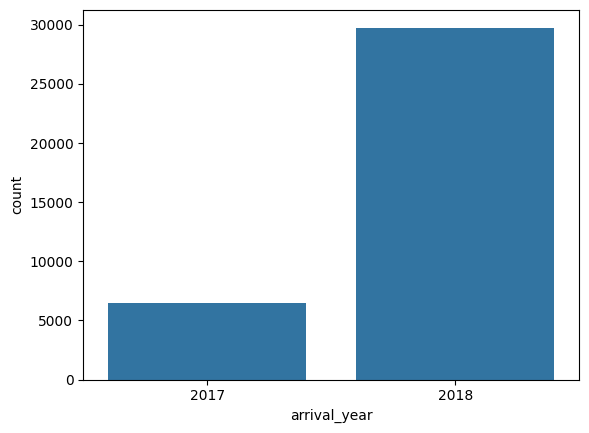

In [12]:
sns.countplot(data=df, x='arrival_year')

* The majority of the data is in the year 2018.

<Axes: xlabel='arrival_month', ylabel='count'>

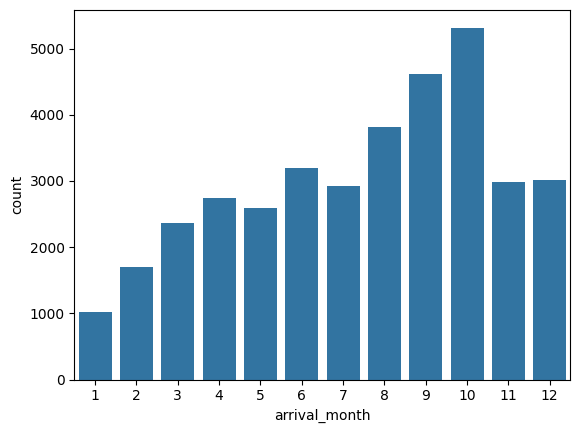

In [13]:
sns.countplot(data=df, x='arrival_month')

**1. What are the busiest months in the hotel?**

* August, September, and October appear to be the busiest months.
* January, February, and March are the least busy months.

<Axes: xlabel='arrival_date', ylabel='count'>

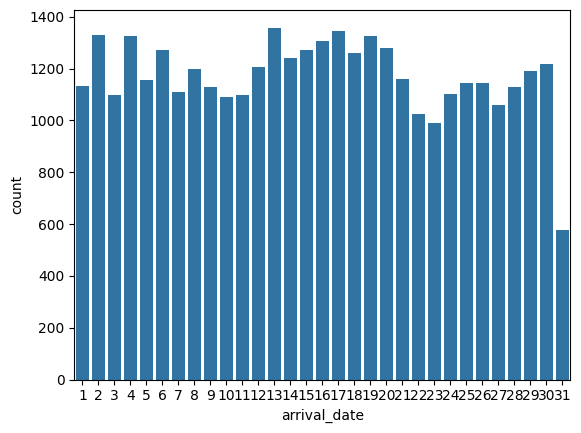

In [14]:
sns.countplot(data=df, x='arrival_date')

* The beginning and middle of the month appear to be the busiest time.

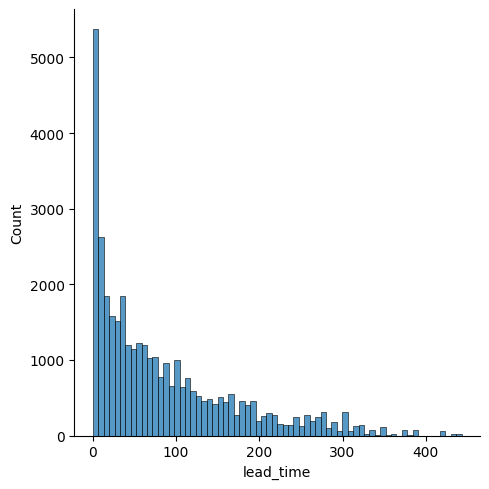

In [15]:
sns.displot(data=df, x='lead_time')

<Axes: xlabel='lead_time'>

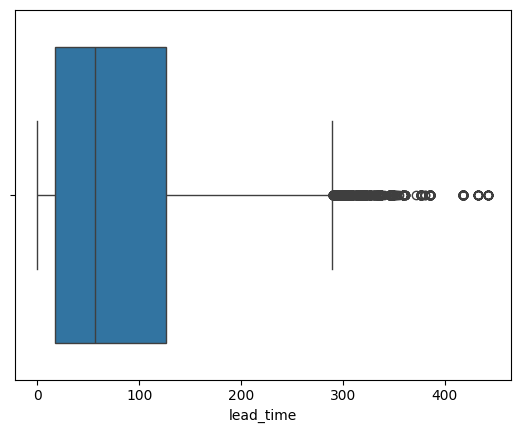

In [16]:
sns.boxplot(data=df, x='lead_time')

* Most bookings have little to no lead time.
* The majority of lead time is under 100 days.
* There are many outliers with lead times of 300 days or more.

#### Observations on number of nights

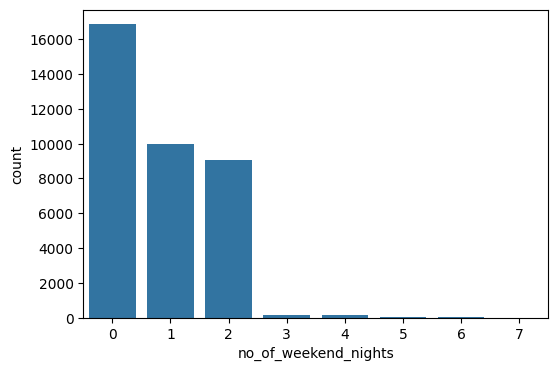

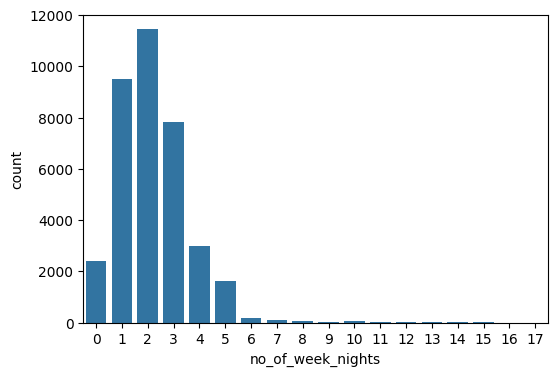

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='no_of_weekend_nights')
plt.show()
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='no_of_week_nights')
plt.show()

* Number of weekend nights is typically either 0, 1, or 2, which means that most bookings are for 1 week or less.
* 1, 2, or 3 week nights appears to be the most common for bookings.

#### Observations on guests

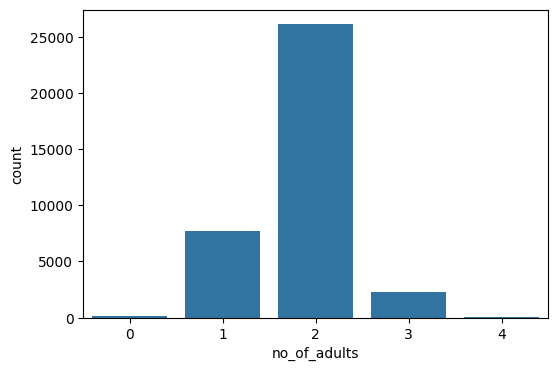

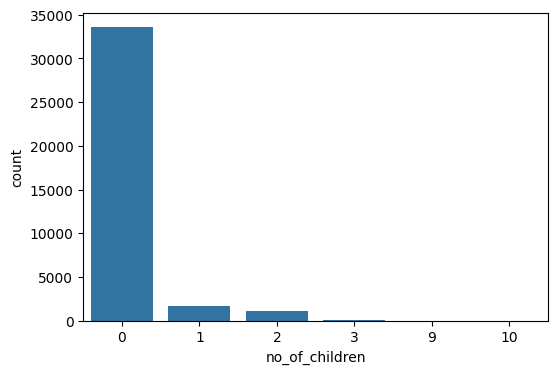

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='no_of_adults')
plt.show()
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='no_of_children')
plt.show()

* 2 adults is the most common booking.
* There are not many bookings with children.

<Axes: xlabel='repeated_guest', ylabel='count'>

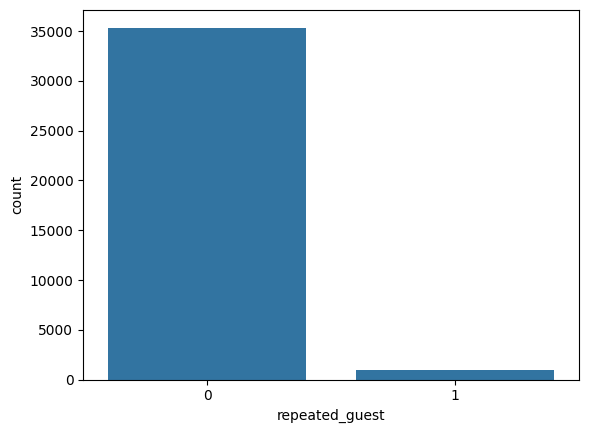

In [19]:
sns.countplot(data=df, x='repeated_guest')

* There are are very few repeated guests.

#### Observations on market segment

<Axes: xlabel='market_segment_type', ylabel='count'>

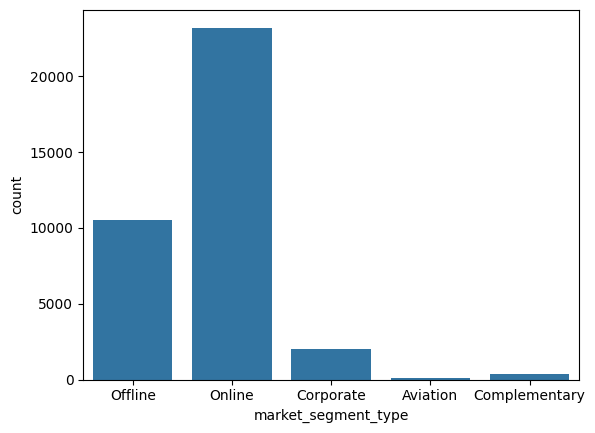

In [20]:
sns.countplot(data=df, x='market_segment_type')

**2. Which market segment do most of the guests come from?**

* The majority of bookings are done online.
* There are about half as many offline bookings as online bookings.

#### Observations on guest requirements

<Axes: xlabel='required_car_parking_space', ylabel='count'>

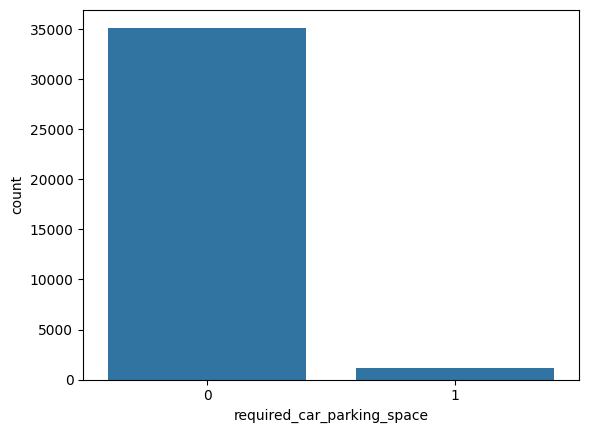

In [21]:
sns.countplot(data=df, x='required_car_parking_space')

* Most guests do no require a parking space.

<Axes: xlabel='type_of_meal_plan', ylabel='count'>

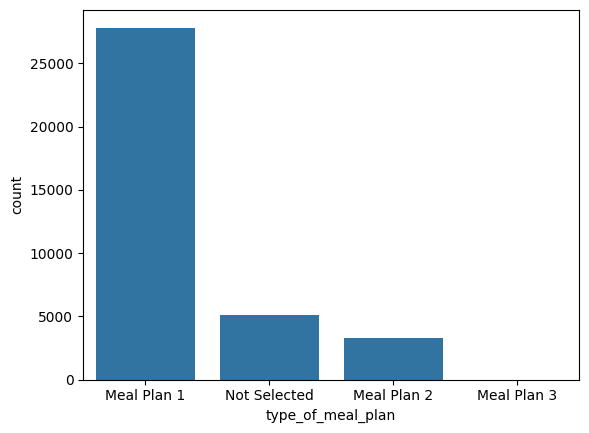

In [22]:
sns.countplot(data=df, x='type_of_meal_plan')

In [23]:
df['type_of_meal_plan'].value_counts()

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

* The majority of guests select Meal Plan 1 (breakfast).
* Only a few guests out of the thousands have selected Meal Plan 3 (breakfast, lunch, & dinner).

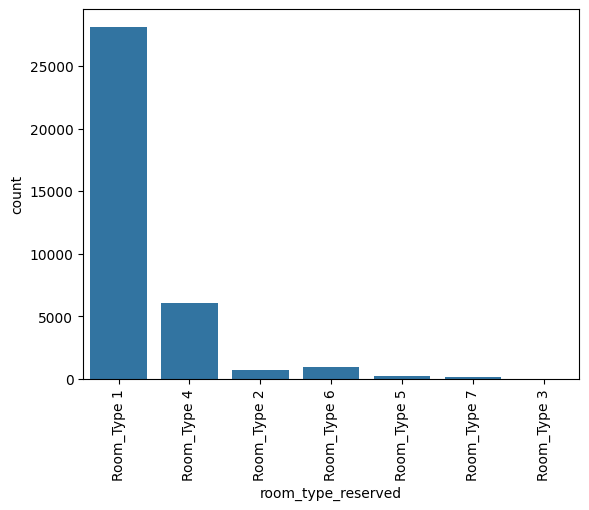

In [24]:
sns.countplot(data=df, x='room_type_reserved')
plt.xticks(rotation=90)
plt.show()

* Majority of guests book Room Type 1.
* Room Type 4 is the second most booked room.
* The other room types are rarely booked.

#### Observations on previous bookings

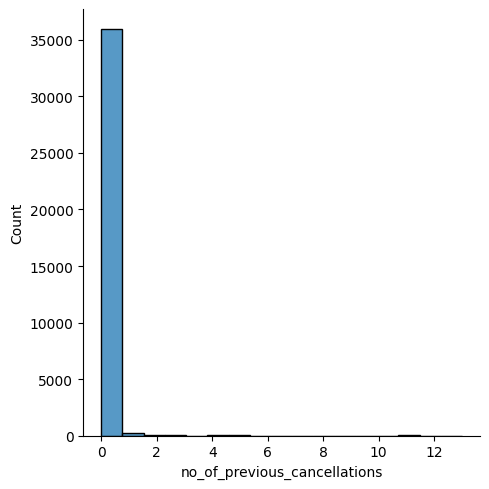

In [25]:
sns.displot(data=df, x='no_of_previous_cancellations')

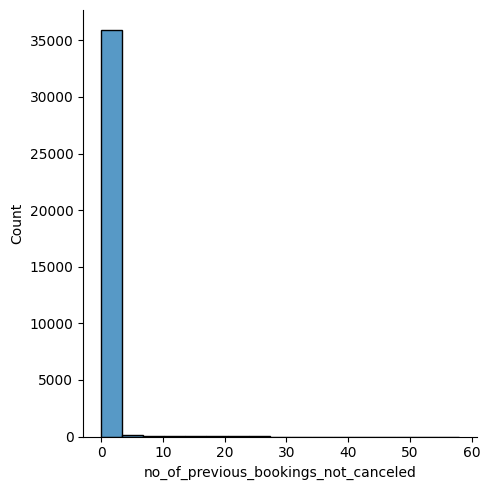

In [26]:
sns.displot(data=df, x='no_of_previous_bookings_not_canceled')

* There are very few previous bookings that were both canceled and not canceled.

#### Observations on room price

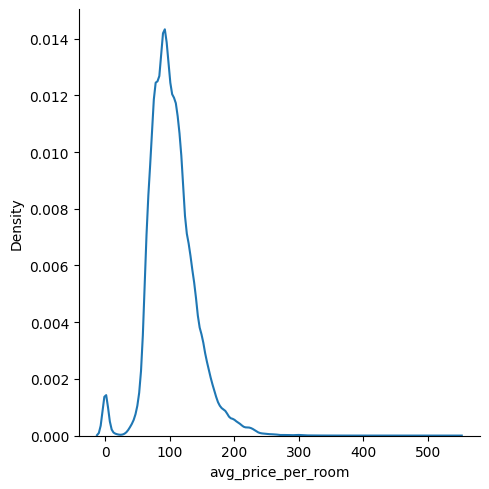

In [27]:
sns.displot(data=df, x='avg_price_per_room', kind='kde')

* The average price per room per day was about 100 euro.

#### Observations on cancellations

<Axes: xlabel='booking_status', ylabel='count'>

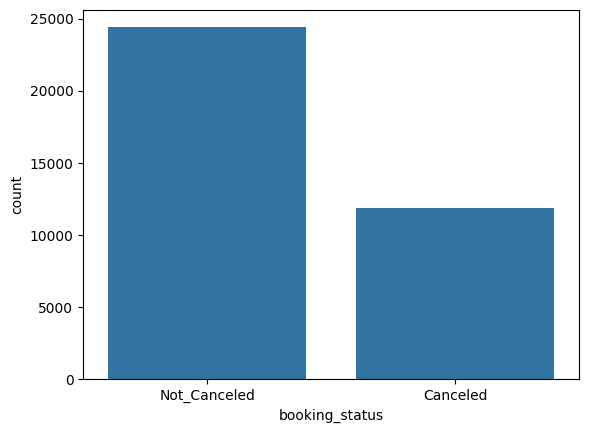

In [28]:
sns.countplot(data=df, x='booking_status')

* There are around half as many canceled bookings as non-canceled bookings.

**4. What percentage of bookings are canceled?**

In [29]:
bookings_canceled = df['booking_status'][df['booking_status'] == 'Canceled'].count()
total_bookings = df.shape[0]
print(f'{round(bookings_canceled / total_bookings * 100, 2)}% of the bookings were canceled.')

32.76% of the bookings were canceled.


### Bivariate Analysis

**Encode 'Cancelled' booking status as 1 and 'Not Cancelled' booking status as 0.**

In [44]:
df['booking_status'] = df['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})

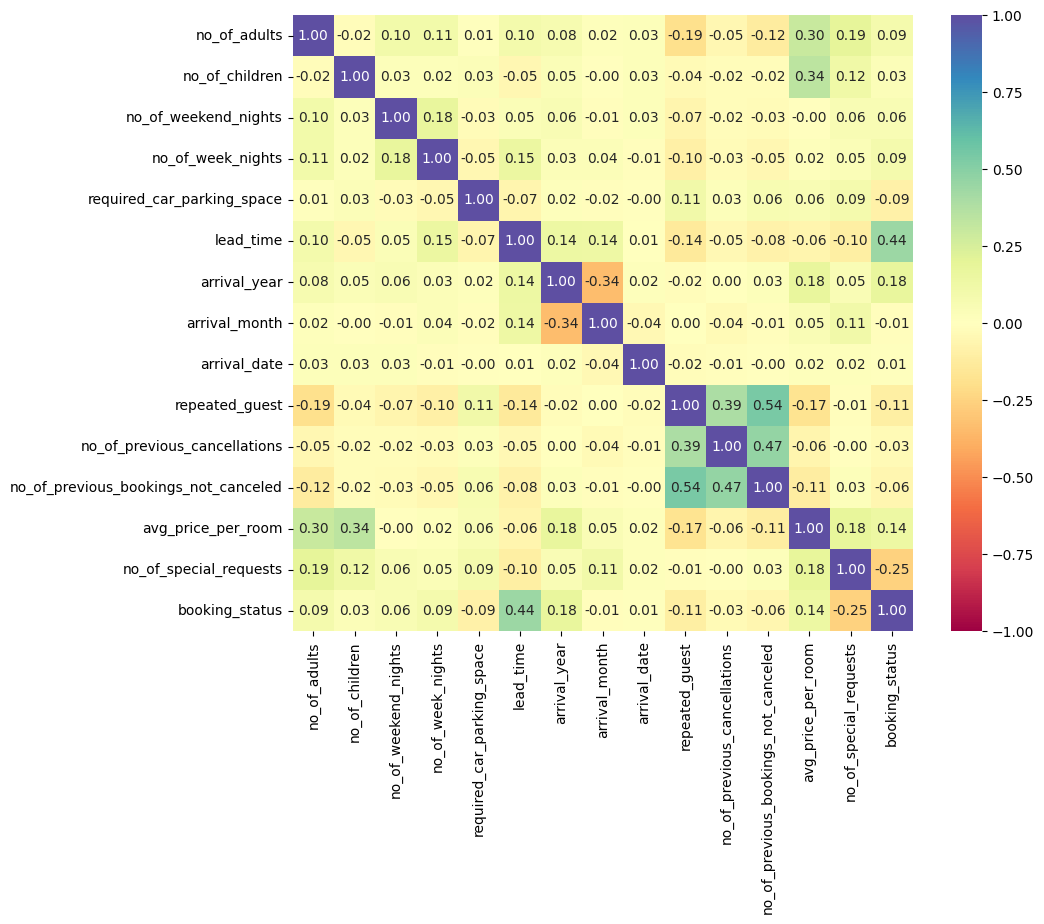

In [116]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral')
plt.show()

* There is a notable correlation between repeated guests and number of previous bookings, but a higher positive correlation with previous bookings not canceled.
* There is a positive correlation between avg_price_per_room and the number of adults and children.
* There is a positive correlation between lead_time and booking_status.
* There is a negative correlation between no_of_special_requests and booking_status.
* There is a slightly positive correlation between no_of_special_requests and no_of_adults.
* There is a slightly positive correlation between no_of_special_requests and avg_price_per_room.
* There is a slightly negative correlation between repeated_guest and avg_price_per_room.

### Lead Time vs. Booking Status

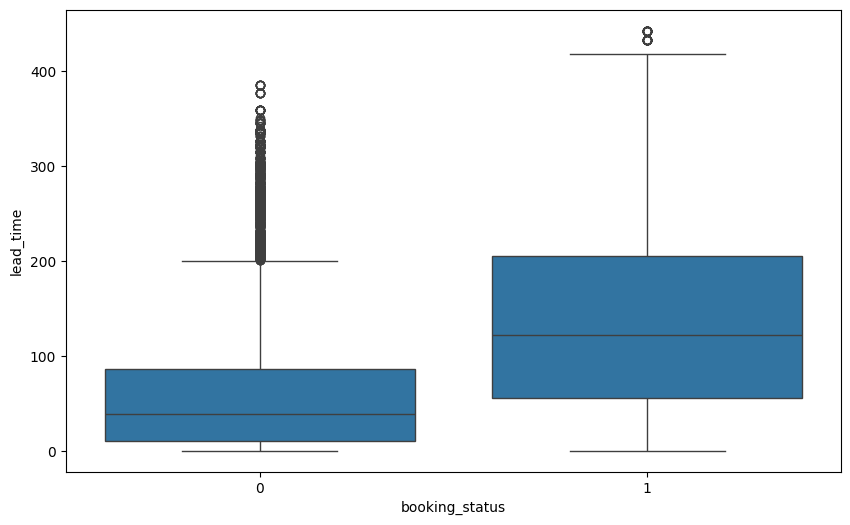

In [119]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='booking_status', y='lead_time')
plt.show()

* Bookings that were not cancelled had a lower overall lead time and bookings that were cancelled.

#### Market Segment vs. Room Price

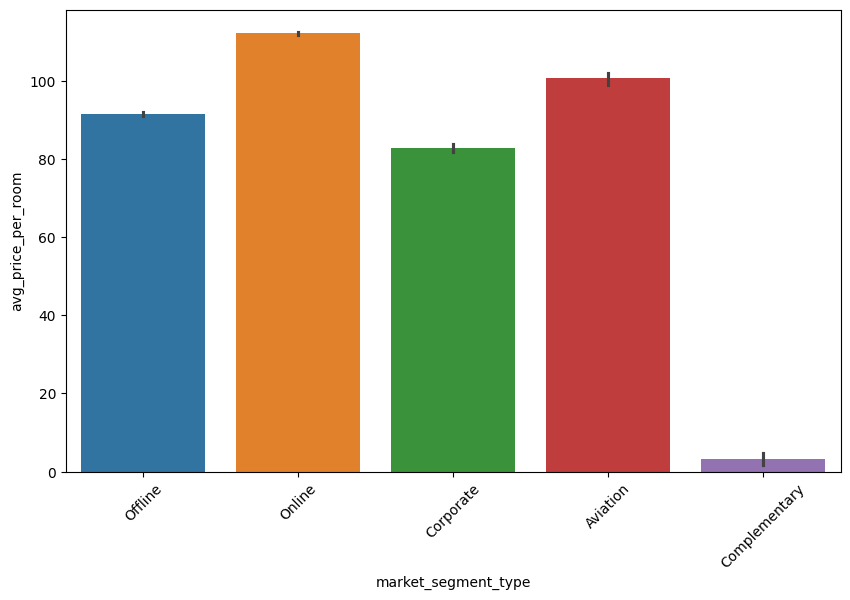

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='market_segment_type', y='avg_price_per_room', hue='market_segment_type')
plt.xticks(rotation=45)
plt.show()

**3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**

* Online bookings have the highest average room prices.
* The Aviation market segment has the second highest average room price.
* The complementary market segment has the lowest room prices and corporate has the second lowest room prices.

#### Room Type vs. Room Price

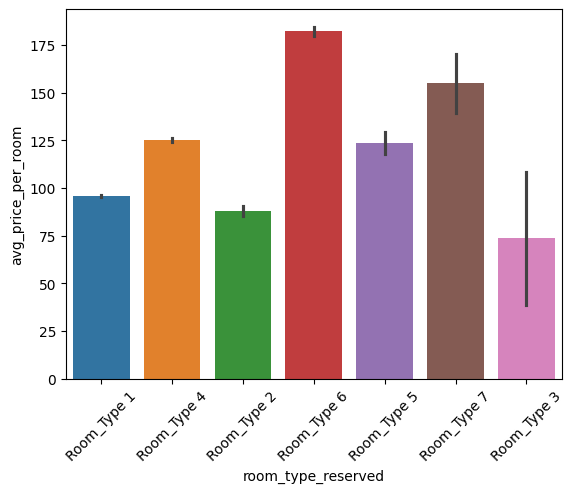

In [32]:
sns.barplot(data=df, x='room_type_reserved', y='avg_price_per_room', hue='room_type_reserved')
plt.xticks(rotation=45)
plt.show()

* Room type 6 has the highest pricing.
* Room type 7 has the second highest average pricing, but has more range than room type 6.
* Room type 3 has the lowest average pricing and the largest range of pricing.

#### Repeat Guests vs. Previous Bookings

In [33]:
repeat_guest_bookings = df[df['repeated_guest'] == 1]

<Axes: xlabel='no_of_previous_bookings_not_canceled'>

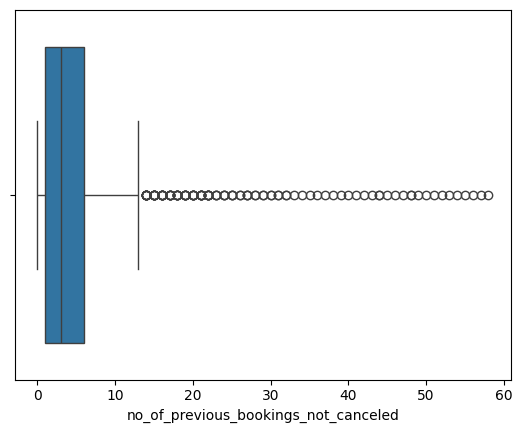

In [34]:
sns.boxplot(data=repeat_guest_bookings, x='no_of_previous_bookings_not_canceled')

<Axes: xlabel='no_of_previous_cancellations'>

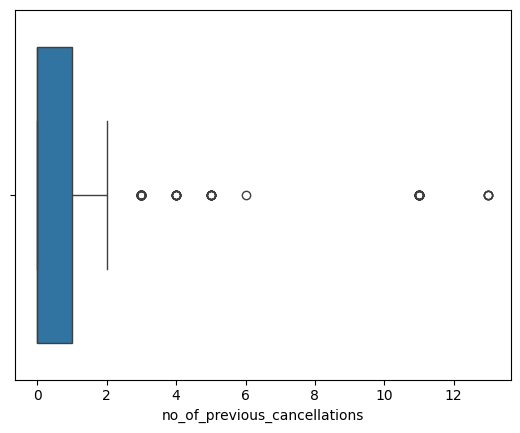

In [35]:
sns.boxplot(data=repeat_guest_bookings, x='no_of_previous_cancellations')

**5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**

In [36]:
cancelled_bookings = df[df['booking_status'] == 'Canceled']

count_of_repeat_guest_bookings = repeat_guest_bookings.shape[0]
count_of_repeat_guest_cancellations = cancelled_bookings[cancelled_bookings['repeated_guest'] == 1].shape[0]
print(f'{round(count_of_repeat_guest_cancellations / count_of_repeat_guest_bookings * 100, 2)}% of the repeating guests canceled.')

1.72% of the repeating guests canceled.


#### Guest Requirements vs. Cancellations

**6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**

<Axes: xlabel='required_car_parking_space', ylabel='count'>

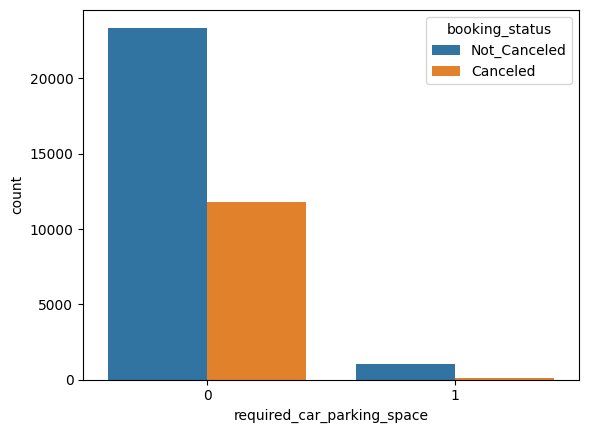

In [37]:
sns.countplot(data=df, x='required_car_parking_space', hue='booking_status')

In [38]:
pd.crosstab(df['required_car_parking_space'], df['booking_status'], normalize='index')

booking_status              Canceled  Not_Canceled
required_car_parking_space                        
0                           0.334870      0.665130
1                           0.101423      0.898577

* There is a lower percentage of cancellations when a parking space is required, only ~10% of bookings cancelled.

<Axes: xlabel='type_of_meal_plan', ylabel='count'>

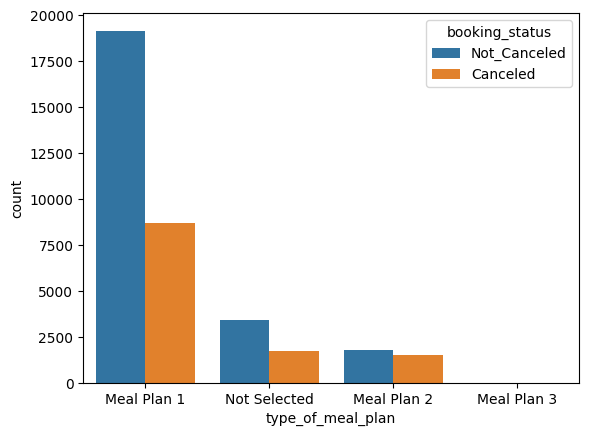

In [39]:
sns.countplot(data=df, x='type_of_meal_plan', hue='booking_status')

In [40]:
pd.crosstab(df['type_of_meal_plan'], df['booking_status'], normalize='index')

booking_status     Canceled  Not_Canceled
type_of_meal_plan                        
Meal Plan 1        0.311802      0.688198
Meal Plan 2        0.455673      0.544327
Meal Plan 3        0.200000      0.800000
Not Selected       0.331189      0.668811

* Meal Plan 3 has the lowest percentage of cancellations, with 20%.
* Meal Plan 2 has the highest percentage of cancellations, with ~46%.
* ~33% of bookings cancelled when no meal plan was selected.

<Axes: xlabel='no_of_special_requests', ylabel='count'>

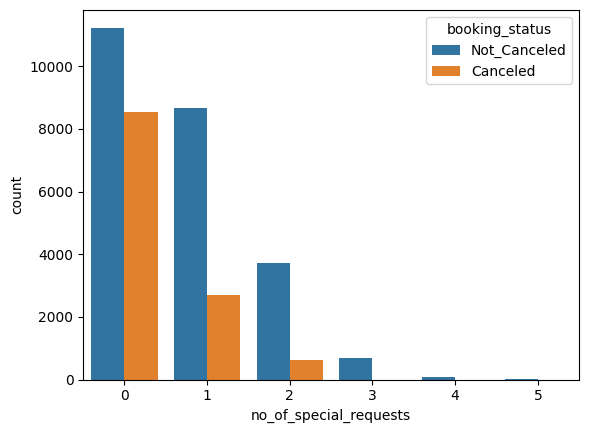

In [41]:
sns.countplot(data=df, x='no_of_special_requests', hue='booking_status')

In [42]:
pd.crosstab(df['no_of_special_requests'], df['booking_status'], normalize='index')

booking_status          Canceled  Not_Canceled
no_of_special_requests                        
0                       0.432068      0.567932
1                       0.237668      0.762332
2                       0.145967      0.854033
3                       0.000000      1.000000
4                       0.000000      1.000000
5                       0.000000      1.000000

* There were no cancellations when 3 or more special requests were made.
* There is a ~43% cancellation rate when no special requests are made.
* The more special requests that are made, the lower the cancellation rate.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Check for outliers**

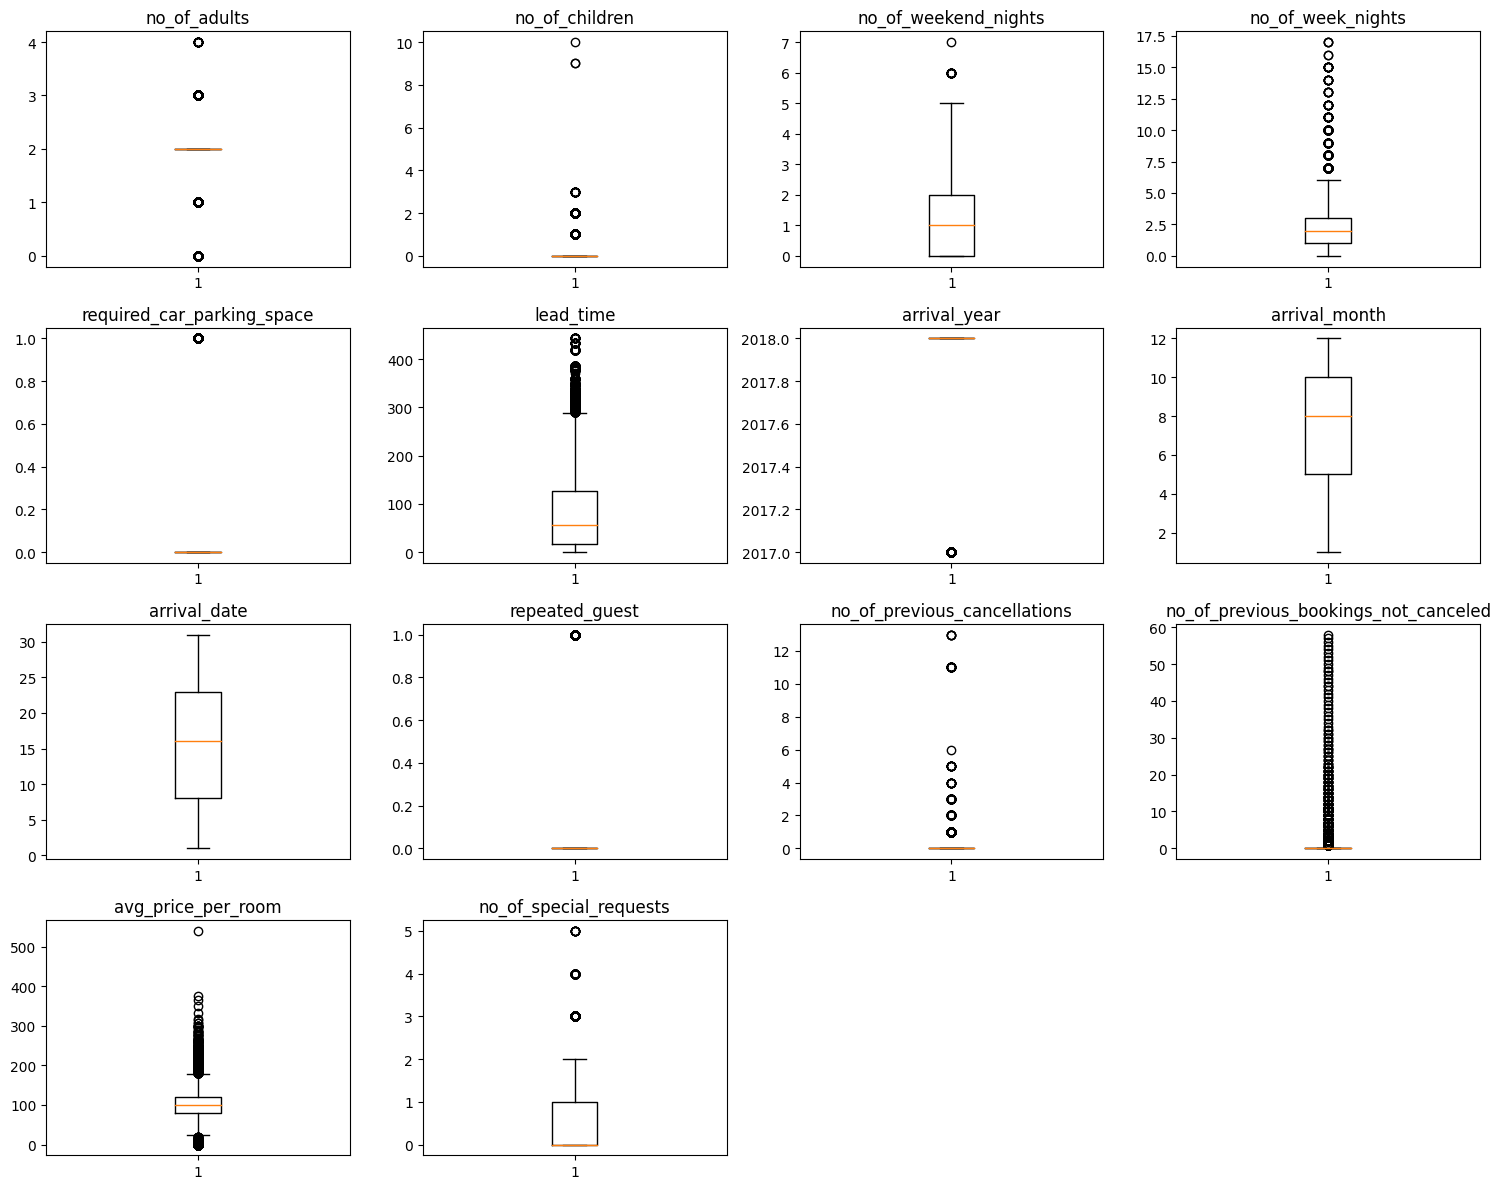

In [43]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Create training and test sets.**

In [45]:
# set independent and dependent variables
X = df.drop('booking_status', axis=1)
y = df['booking_status']

# adding a constant to the independent variables
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True, dtype='int')

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [46]:
X_train.head()

const  no_of_adults  no_of_children  no_of_weekend_nights  \
13662    1.0             1               0                     0   
26641    1.0             2               0                     0   
17835    1.0             2               0                     2   
21485    1.0             2               0                     0   
5670     1.0             2               0                     1   

       no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
13662                  1                           0        163          2018   
26641                  3                           0        113          2018   
17835                  3                           0        359          2018   
21485                  3                           0        136          2018   
5670                   2                           0         21          2018   

       arrival_month  arrival_date  repeated_guest  \
13662             10            15               0   
26641              3            31               0   
17835             10            14               0   
21485              6            29               0   
5670               8            15               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
13662                             0                                     0   
26641                             0                                     0   
17835                             0                                     0   
21485                             0                                     0   
5670                              0                                     0   

       avg_price_per_room  no_of_special_requests  \
13662              115.00                       0   
26641               78.15                       1   
17835               78.00                       1   
21485               85.50                       0   
5670               151.00                       0   

       type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
13662                              0                              0   
26641                              0                              0   
17835                              0                              0   
21485                              0                              0   
5670                               0                              0   

       type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
13662                               0                               0   
26641                               0                               1   
17835                               0                               0   
21485                               1                               0   
5670                                0                               0   

       room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
13662                               0                               0   
26641                               0                               0   
17835                               0                               0   
21485                               0                               0   
5670                                0                               0   

       room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
13662                               0                               0   
26641                               0                               0   
17835                               0                               0   
21485                               0                               0   
5670                                0                               0   

       room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
13662                               0                                  0   
26641                               0                                  0   
17835                           

## Building a Logistic Regression model

In [47]:
# build logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sat, 15 Jun 2024   Pseudo R-squ.:                  0.3293
Time:                        03:11:26   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.5923    120.817     -7.653      0.000   -1161.390    -687.795
no_of_adults                             0.1135      

### Model performance evaluation

**Model can make wrong predictions such as**:

1. Model predicts a booking gets cancelled but actually doesn't. (False Positive)

2. Model predicts a booking does not get cancelled but actually does. (False Negative)

**Which case is more important?**

* Both the cases are important as:

  * If we predict a booking gets cancelled but actually doesn't, the hotel might not have allocated the appropriate resources to handle the booking, leading to potential negative experiences by customers.

  * If we predict a booking doesn't get cancelled but actually does, the hotel is looking at a potential loss of revenue.


**How to reduce this loss?**

* In this case, we need to reduce both False Negatives and False Positives.

* `f1_score` should be maximized in order to reduce both False Negatives and False Positives.

### Define functions for model performance checks

In [48]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [49]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", cmap="viridis")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Check performance of initial model

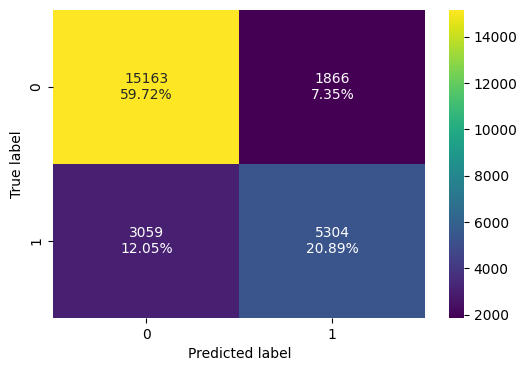

In [50]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [51]:
model_performance_classification_statsmodels(lg, X_train, y_train)

Accuracy    Recall  Precision        F1
0  0.806041  0.634222   0.739749  0.682933

* F1 score is **~0.68**
* We will try to improve this by checking for and removing any multicollinearity.

### Checking multicollinearity

In [52]:
def check_vif(predictors):
    vif = pd.Series(
        [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])],
        index=predictors.columns,
        dtype=float
    )
    return vif

In [53]:
check_vif(X_train)

const                                   3.946816e+07
no_of_adults                            1.348154e+00
no_of_children                          1.978229e+00
no_of_weekend_nights                    1.069475e+00
no_of_week_nights                       1.095667e+00
required_car_parking_space              1.039928e+00
lead_time                               1.394914e+00
arrival_year                            1.430830e+00
arrival_month                           1.275673e+00
arrival_date                            1.006738e+00
repeated_guest                          1.783516e+00
no_of_previous_cancellations            1.395689e+00
no_of_previous_bookings_not_canceled    1.651986e+00
avg_price_per_room                      2.050421e+00
no_of_special_requests                  1.247278e+00
type_of_meal_plan_Meal Plan 2           1.271851e+00
type_of_meal_plan_Meal Plan 3           1.025216e+00
type_of_meal_plan_Not Selected          1.272183e+00
room_type_reserved_Room_Type 2          1.1014

* market_segment_type_Offline and market_segment_type_Online show moderate multicollinearity.
* market_segment_type_Complementary shows low multicollinearity.

### Removing multicollinearity

**Remove `market_segment_type_Online`**

In [54]:
# create new training set with dropped column
X_train1 = X_train.drop('market_segment_type_Online', axis=1)

# display new vif values
check_vif(X_train1)

const                                   3.939137e+07
no_of_adults                            1.331784e+00
no_of_children                          1.977350e+00
no_of_weekend_nights                    1.069039e+00
no_of_week_nights                       1.095118e+00
required_car_parking_space              1.039795e+00
lead_time                               1.390637e+00
arrival_year                            1.428376e+00
arrival_month                           1.274625e+00
arrival_date                            1.006721e+00
repeated_guest                          1.780188e+00
no_of_previous_cancellations            1.395447e+00
no_of_previous_bookings_not_canceled    1.651745e+00
avg_price_per_room                      2.049595e+00
no_of_special_requests                  1.242418e+00
type_of_meal_plan_Meal Plan 2           1.271497e+00
type_of_meal_plan_Meal Plan 3           1.025216e+00
type_of_meal_plan_Not Selected          1.270387e+00
room_type_reserved_Room_Type 2          1.1012

* There are no more variables with high VIF values, indicating that we have removed any significant multicollinearity.

In [55]:
# build new logistic regression model
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)

model_performance_classification_statsmodels(lg1, X_train1, y_train)

Accuracy    Recall  Precision        F1
0  0.805766  0.633744   0.739294  0.682462

* No significant change in model performance.
* Next we can check for and remove any high p-value variables that are insignificant.

### Removing high p-value variables

In [56]:
# initial list of columns
cols = X_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

# build loop to remove variables with p-value > 0.05
while len(cols) > 0:
    # defining the train set
    X_train_temp = X_train1[cols]

    # fitting the model
    logit_temp = sm.Logit(y_train, X_train_temp).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = logit_temp.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [57]:
# create new training set with high p-value features removed
X_train2 = X_train1[selected_features]

In [58]:
# build new model
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sat, 15 Jun 2024   Pseudo R-squ.:                  0.3283
Time:                        03:11:33   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -917.2860    120.456     -7.615      0.000   -1153.376    -681.196
no_of_adults                       0.1086      0.037      2.914      0.

### Coefficient Interpretations

In [59]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           0.0      1.114754        1.164360              1.114753   
Change_odd% -100.0     11.475363       16.436009             11.475256   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                  1.042636                    0.203048   1.015835   
Change_odd%           4.263629                  -79.695231   1.583521   

             arrival_year  arrival_month  repeated_guest  \
Odds             1.573235       0.958528        0.064797   
Change_odd%     57.323511      -4.147245      -93.520258   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                             1.257157            1.019348   
Change_odd%                     25.715665            1.934790   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                       0.229941                       1.179916   
Change_odd%              -77.005947                      17.991562   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                               1.330892                        0.700461   
Change_odd%                       33.089244                      -29.953888   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                               0.753830                        0.479403   
Change_odd%                      -24.617006                      -52.059666   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                               0.380991                        0.239033   
Change_odd%                      -61.900934                      -76.096691   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                              0.452584                     0.167504  
Change_odd%                     -54.741616                   -83.249628

* **required_car_parking_space**: With all other features constant, a booking that is requiring a parking space will decrease the odds of a cancellation by ~80%.
* **repeated_guest**: With all other features constant, a booking by a repeated guest decreased the odds of a cancellation by ~93%.
* **no_of_previous_cancellations**: With all other features constant, a 1 unit change of previous cancellations increases the odds of a cancellation by ~25%.
* **no_of_special_requests**: With all other features constant, a 1 unit change of special requests decreases the odds of a cancellation by ~77%.
* **type_of_meal_plan_Not Selected**: A booking that did not select a meal plan increases odds of a cancellation by ~42%.

### Model performance improvement

**Model performance on training set with default threshold**

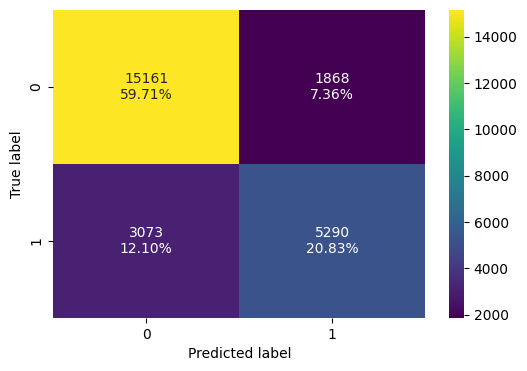

In [60]:
confusion_matrix_statsmodels(
    lg2, X_train2, y_train
)

In [61]:
model_train_default_threshold = model_performance_classification_statsmodels(
    lg2, X_train2, y_train
)
model_train_default_threshold

Accuracy    Recall  Precision        F1
0  0.805411  0.632548   0.739033  0.681657

**Model performance on test set with default threshold**

In [62]:
# drop same columns that were dropped from training set on test set
X_test2 = X_test[list(X_train2.columns)]

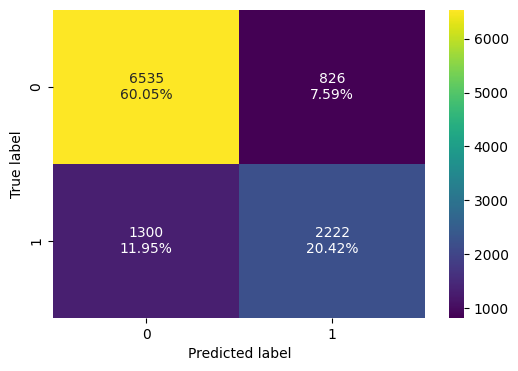

In [63]:
confusion_matrix_statsmodels(
    lg2, X_test2, y_test
)

In [64]:
model_test_default_threshold = model_performance_classification_statsmodels(
    lg2, X_test2, y_test
)
model_test_default_threshold

Accuracy    Recall  Precision        F1
0  0.804649  0.630892   0.729003  0.676408

### Check ROC curve

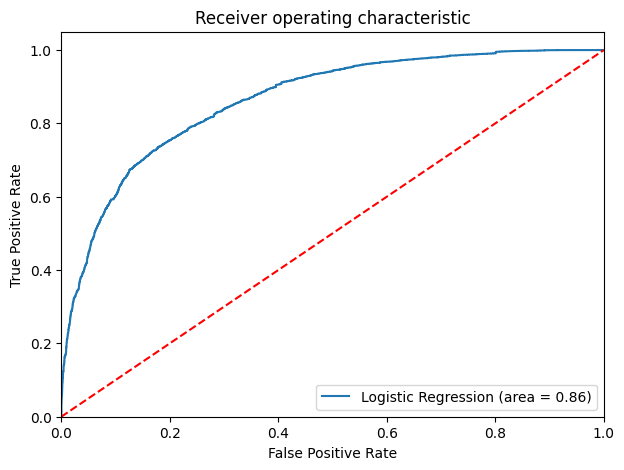

In [65]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* The area under the curve is 0.86, indicating that the logistic regression model has good performance on the training set.

### Finding optimal threshold using AUC-ROC curve

In [66]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.37104666234890077


**Check performance on training set with optimal threshold using AUC-ROC curve**

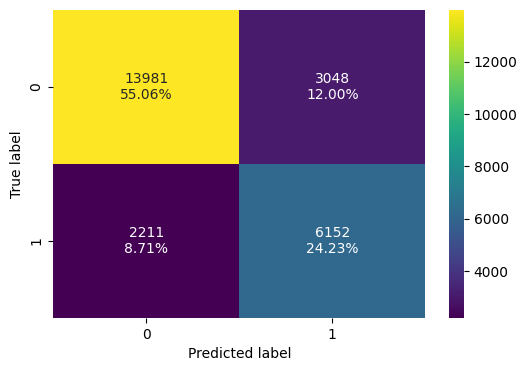

In [67]:
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [68]:
model_train_optimal_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
model_train_optimal_threshold_auc_roc

Accuracy    Recall  Precision        F1
0  0.792888  0.735621   0.668696  0.700564

**Check performance on test set with optimal threshold using AUC-ROC curve**

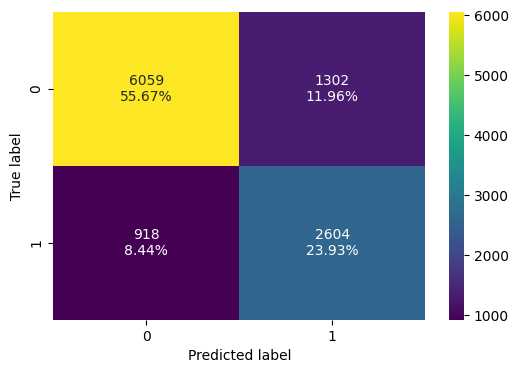

In [69]:
confusion_matrix_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc
)

In [70]:
model_test_optimal_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
model_test_optimal_threshold_auc_roc

Accuracy    Recall  Precision        F1
0  0.796012  0.739353   0.666667  0.701131

### Finding optimal threshold using Precision-Recall curve

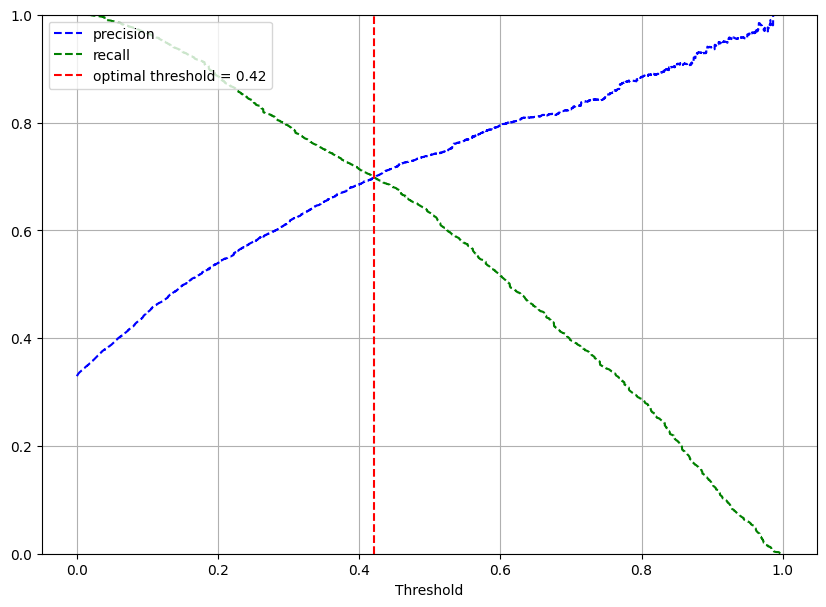

In [71]:
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.ylim([0, 1])

# find threshold where precision equals recall
diff = np.abs(prec - rec)
min_diff_index = np.argmin(diff)
optimal_threshold_curve = tre[min_diff_index]

plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.axvline(x=optimal_threshold_curve, color="r", linestyle="--", label=f'optimal threshold = {optimal_threshold_curve:.2f}')
plt.grid()
plt.legend(loc="upper left")
plt.show()

**Check performance of training set with optimal threshold using Precision-Recall curve**

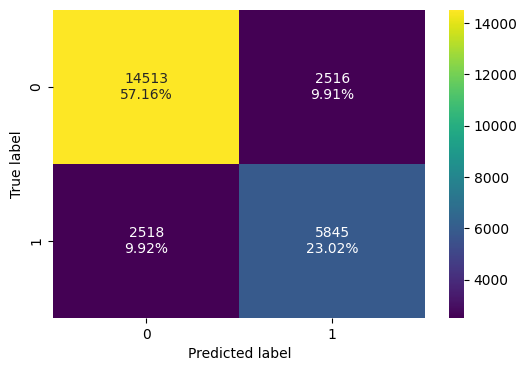

In [72]:
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_curve
)

In [73]:
model_train_optimal_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_curve
)
model_train_optimal_threshold_curve

Accuracy    Recall  Precision        F1
0  0.801749  0.698912   0.699079  0.698995

**Check performance of test set with optimal threshold using Precision-Recall curve**

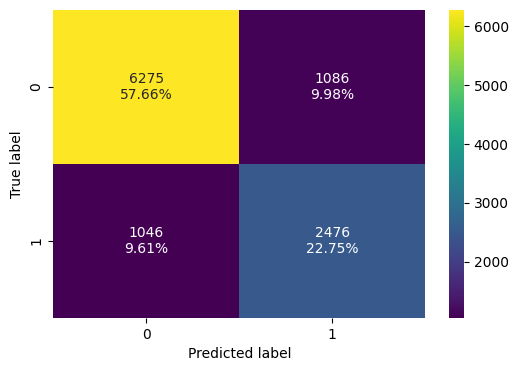

In [74]:
confusion_matrix_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_curve
)

In [75]:
model_test_optimal_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_curve
)
model_test_optimal_threshold_curve

Accuracy   Recall  Precision       F1
0  0.804098  0.70301   0.695115  0.69904

### Compare models and select final model

In [76]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_train_default_threshold.T,
        model_train_optimal_threshold_auc_roc.T,
        model_train_optimal_threshold_curve.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    f'Default Threshold (0.5)',
    f'AUC-ROC Threshold ({optimal_threshold_auc_roc:.2f})',
    f'Precision-Recall Threshold ({optimal_threshold_curve:.2f})'
]

models_train_comp_df

Default Threshold (0.5)  AUC-ROC Threshold (0.37)  \
Accuracy                  0.805411                  0.792888   
Recall                    0.632548                  0.735621   
Precision                 0.739033                  0.668696   
F1                        0.681657                  0.700564   

           Precision-Recall Threshold (0.42)  
Accuracy                            0.801749  
Recall                              0.698912  
Precision                           0.699079  
F1                                  0.698995

In [77]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        model_test_default_threshold.T,
        model_test_optimal_threshold_auc_roc.T,
        model_test_optimal_threshold_curve.T
    ],
    axis=1,
)
models_test_comp_df.columns = [
    f'Default Threshold (0.5)',
    f'AUC-ROC Threshold ({optimal_threshold_auc_roc:.2f})',
    f'Precision-Recall Threshold ({optimal_threshold_curve:.2f})'
]

models_test_comp_df

Default Threshold (0.5)  AUC-ROC Threshold (0.37)  \
Accuracy                  0.804649                  0.796012   
Recall                    0.630892                  0.739353   
Precision                 0.729003                  0.666667   
F1                        0.676408                  0.701131   

           Precision-Recall Threshold (0.42)  
Accuracy                            0.804098  
Recall                              0.703010  
Precision                           0.695115  
F1                                  0.699040

* The model using the AUC-ROC threshold of 0.37 gives the best F1 score.
* Since we are focusing on maximizing F1 score, we will select this as our final model.

## Building a Decision Tree model

**Define functions for model performance checks**

In [78]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [79]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Build initial model**

In [80]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

**Check model performance on training set**

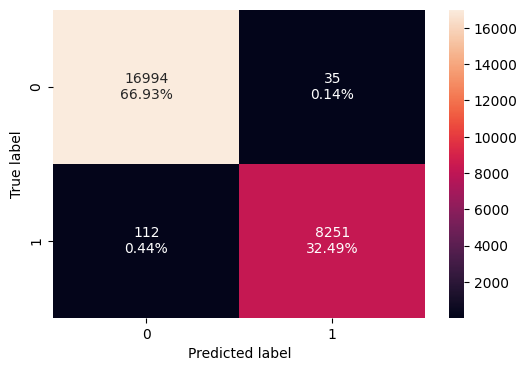

In [81]:
confusion_matrix_sklearn(model, X_train, y_train)

In [82]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy    Recall  Precision        F1
0  0.994211  0.986608   0.995776  0.991171

**Check model performance on test set**

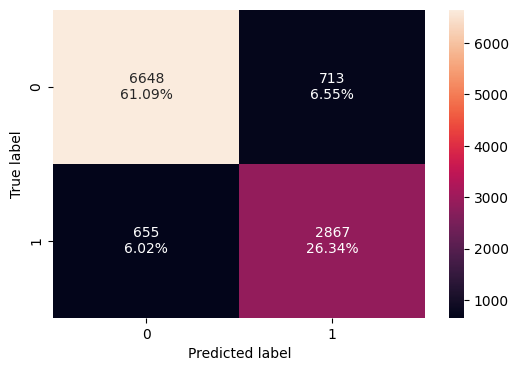

In [83]:
confusion_matrix_sklearn(model, X_test, y_test)

In [84]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0  0.874299  0.814026   0.800838  0.807378

### Visualize decision tree

In [85]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


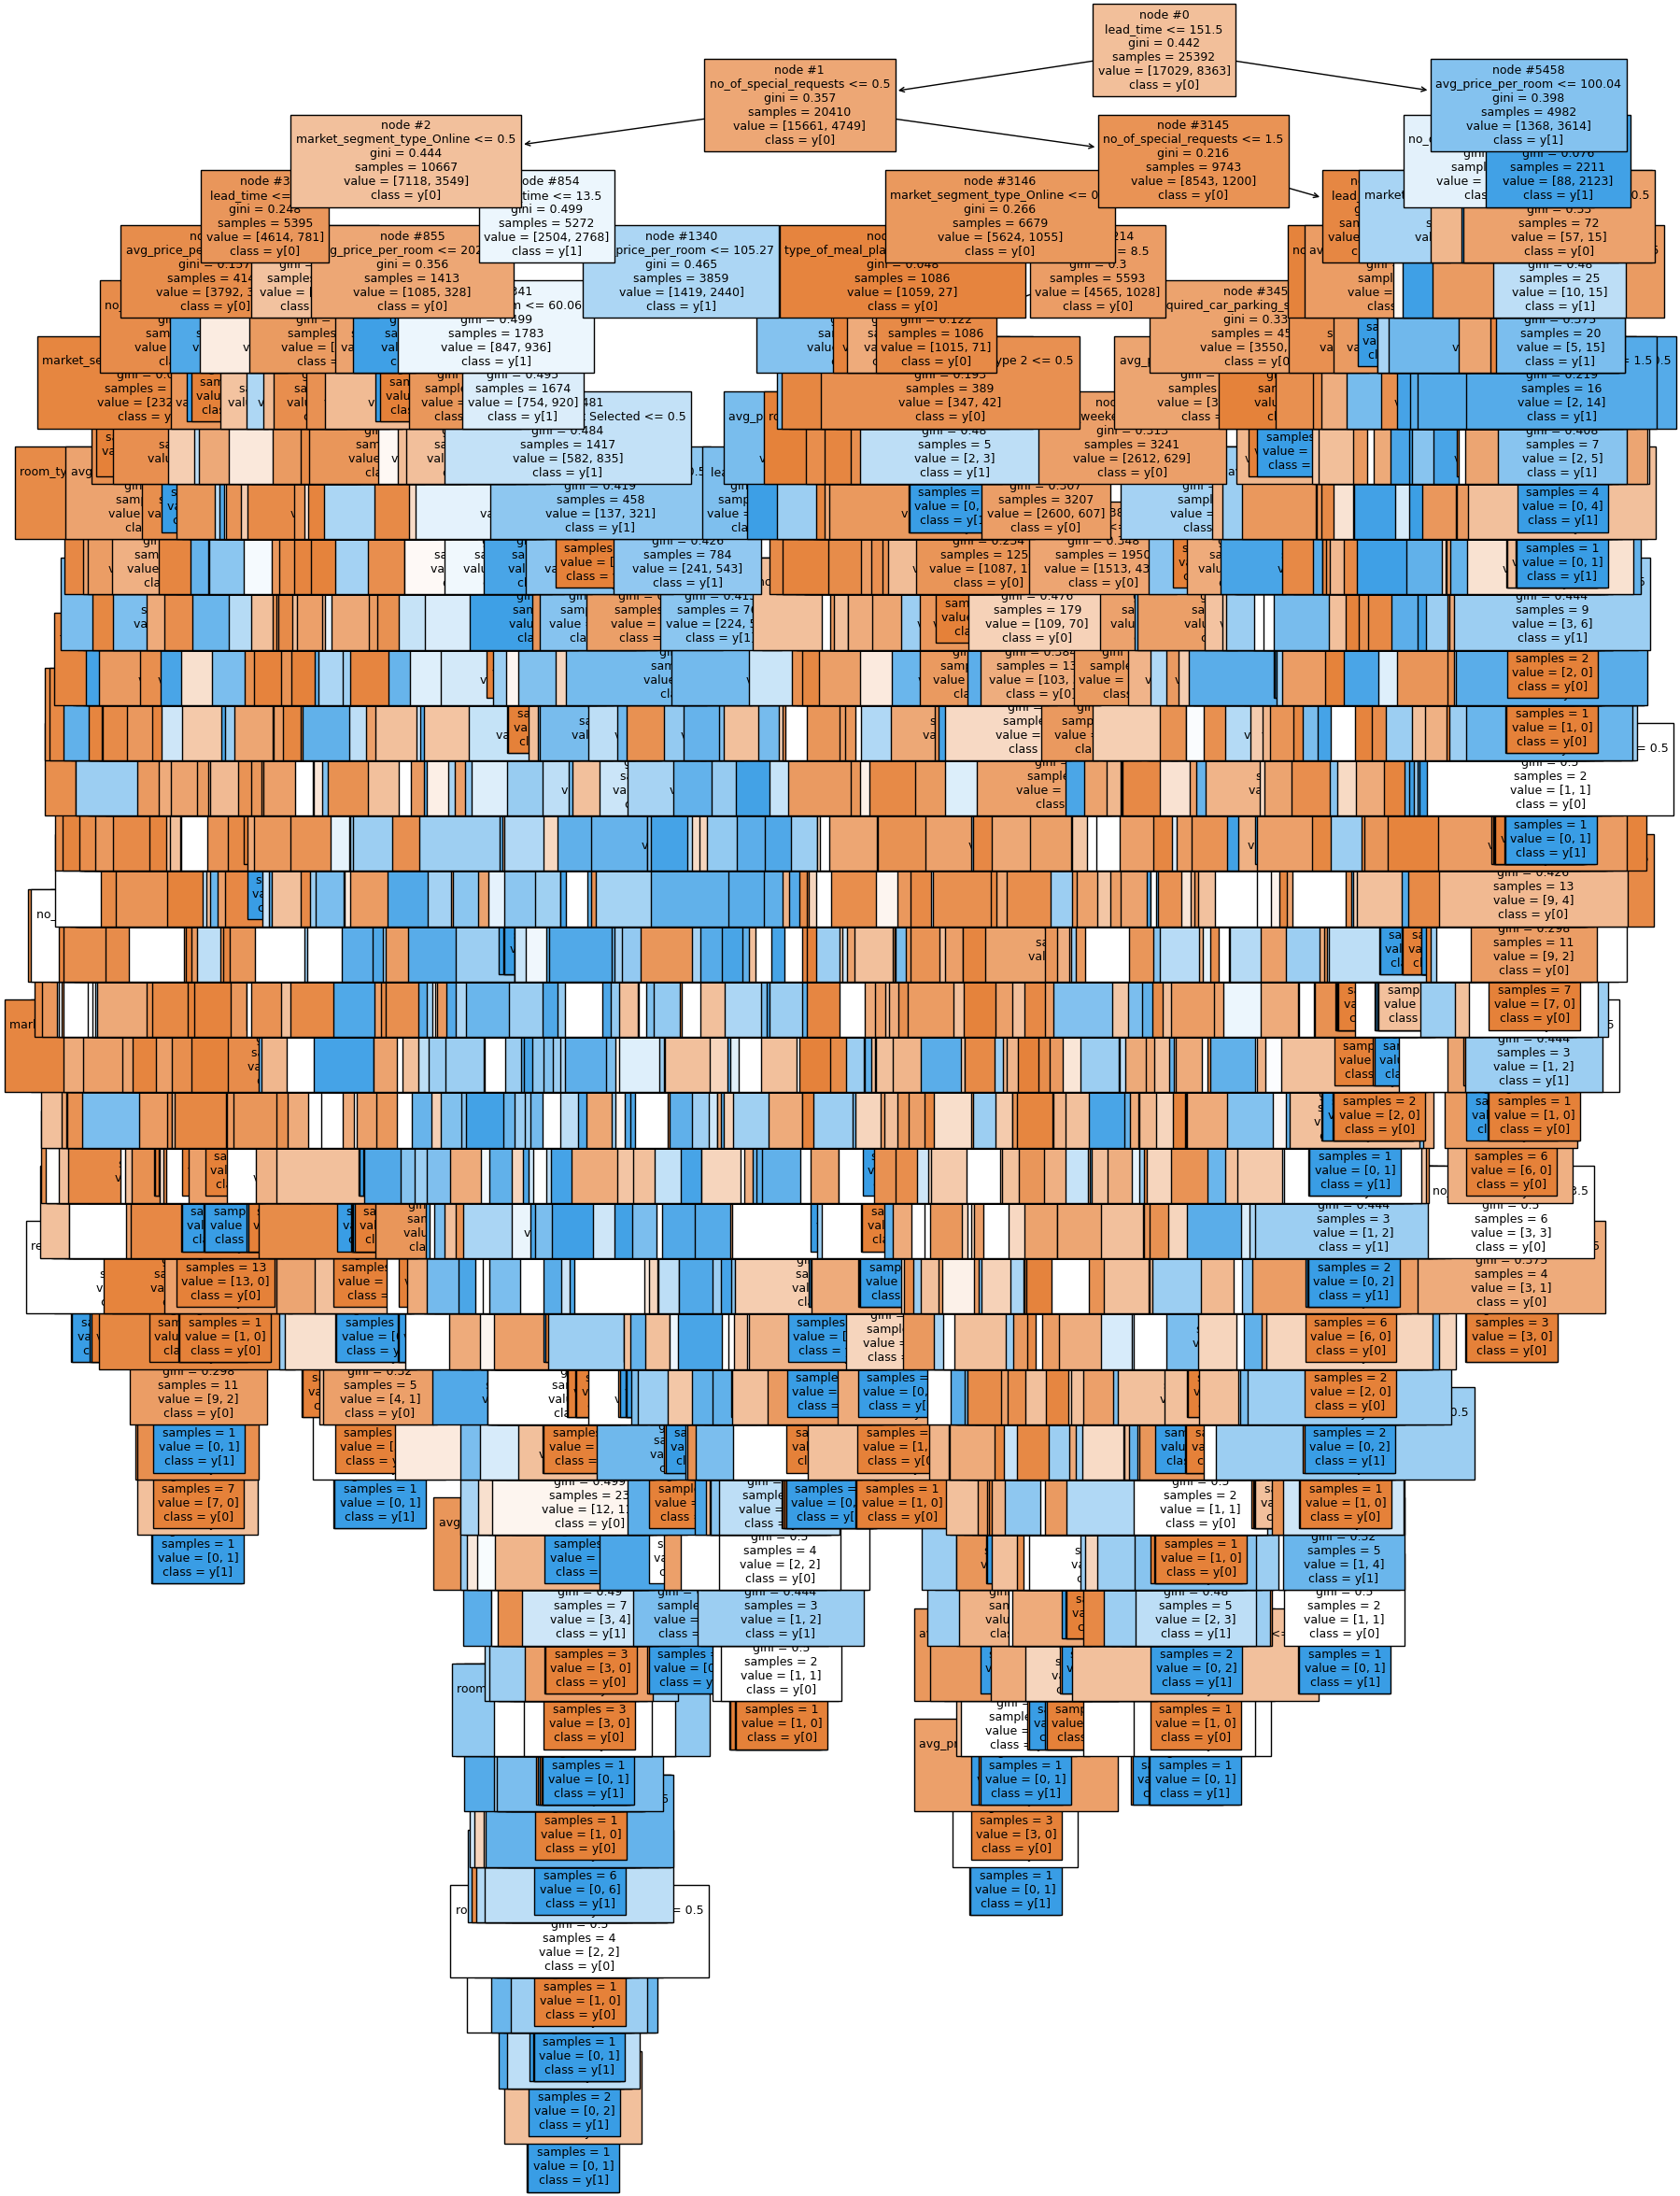

In [86]:
# plot decision tree
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [87]:
# print text report of tree
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [147.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type

**Check important features**

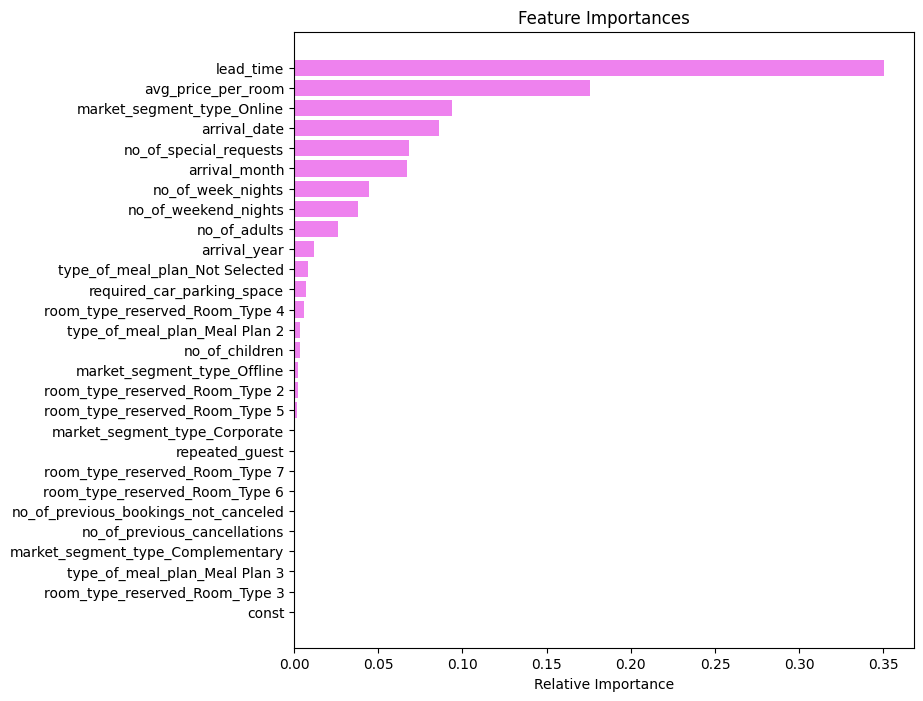

In [88]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Pre-pruning

**Hyperparameter tuning**

In [89]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

**Check performance on training set**

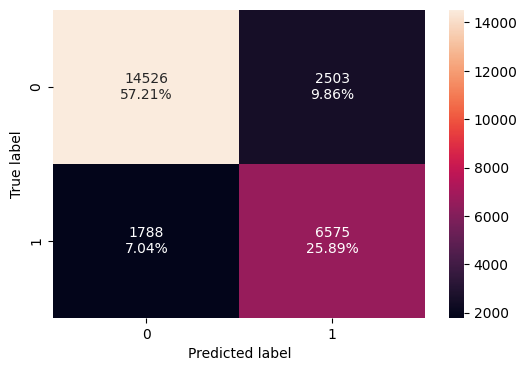

In [90]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [91]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0   0.83101  0.786201   0.724278  0.753971

**Check performance on test set**

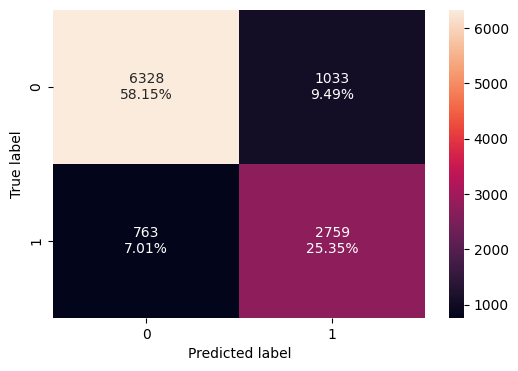

In [92]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [93]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.834972  0.783362   0.727584  0.754444

* F1 score did not improve after tuning

**Visualize decision tree after hyperparameter tuning**

In [94]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

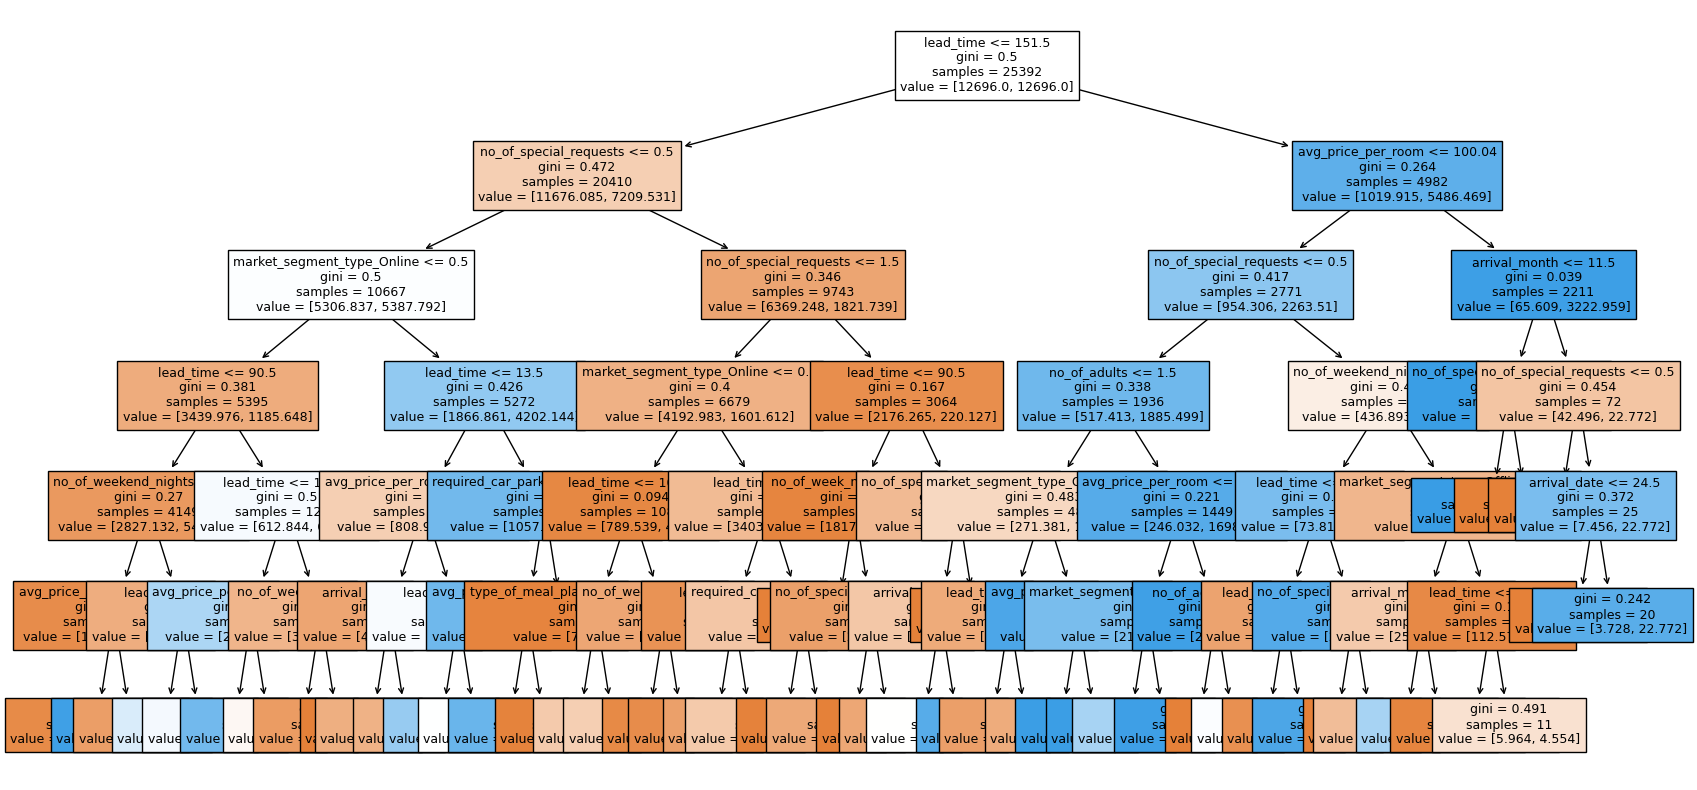

In [95]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [96]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 132.08] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 25.81] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

In [97]:
importances = estimator.feature_importances_
importances

array([0.        , 0.02691882, 0.        , 0.02058904, 0.00699927,
       0.01410054, 0.47554582, 0.        , 0.01412465, 0.00076035,
       0.        , 0.        , 0.        , 0.07623326, 0.16917567,
       0.        , 0.        , 0.00094952, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0100065 , 0.18459655])

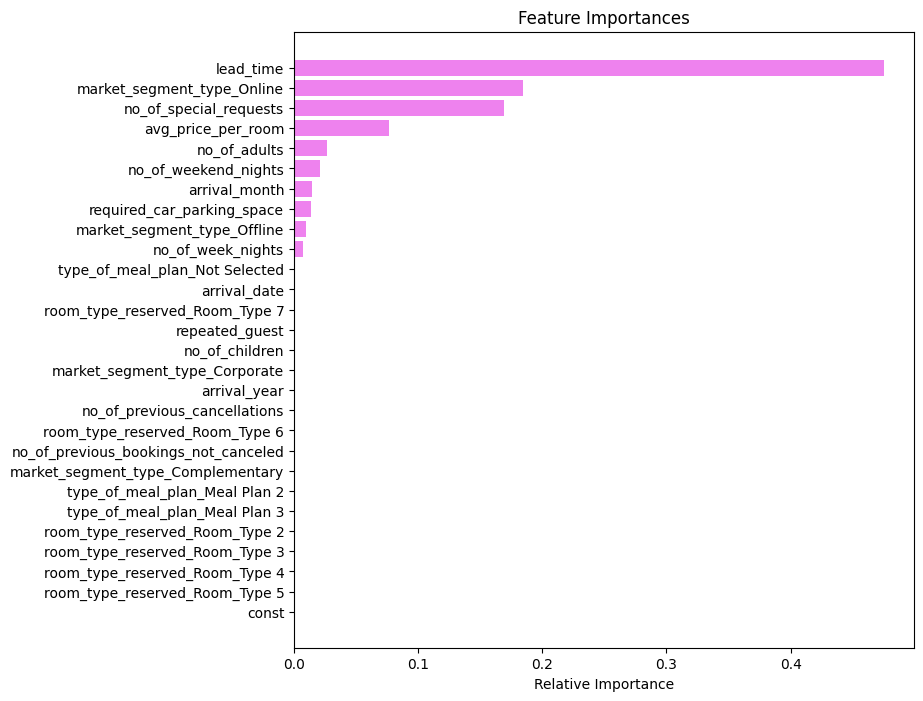

In [98]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* lead_time is the most important feature in both pre-tuned and tuned decision tree.

### Cost Complexity Pruning

In [99]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [100]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.008376
1     0.000000e+00    0.008376
2     2.933821e-20    0.008376
3     2.933821e-20    0.008376
4     2.933821e-20    0.008376
...            ...         ...
1839  8.901596e-03    0.328058
1840  9.802243e-03    0.337860
1841  1.271875e-02    0.350579
1842  3.412090e-02    0.418821
1843  8.117914e-02    0.500000

[1844 rows x 2 columns]

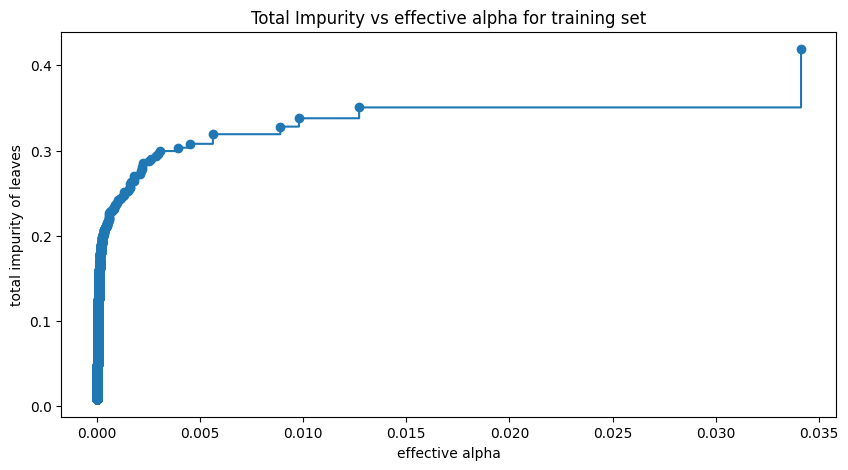

In [101]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [102]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136943


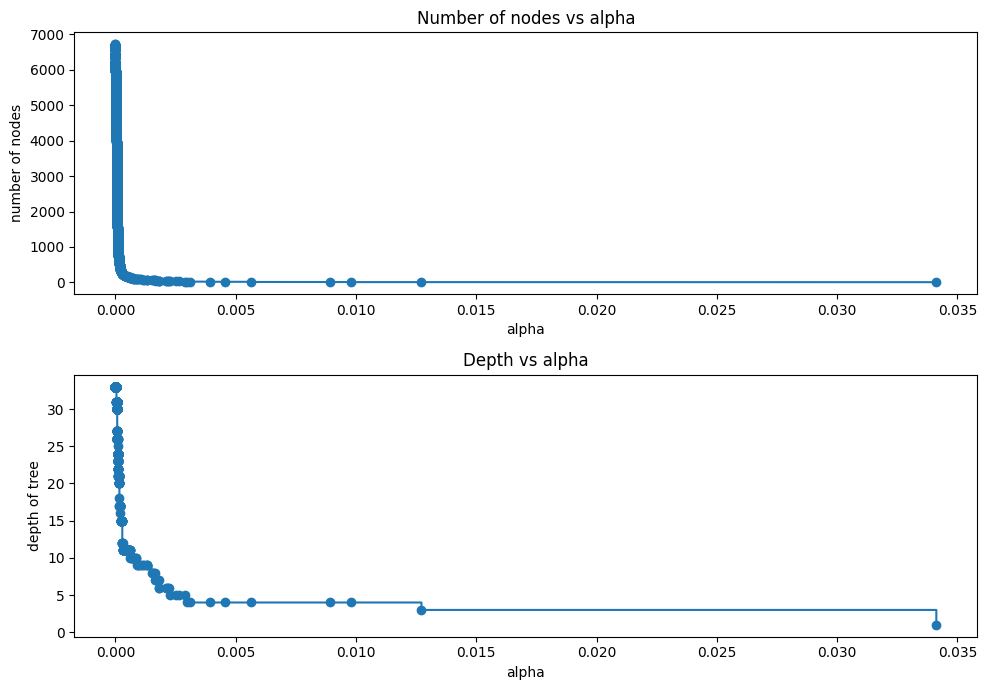

In [103]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### F1 score vs alpha for training and testing sets

In [104]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

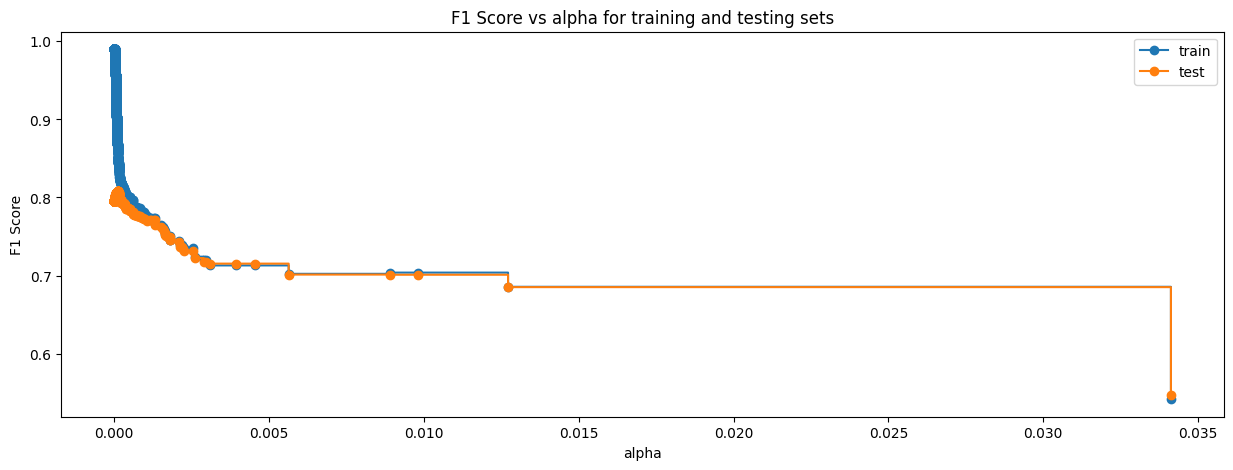

In [105]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [106]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167002,
                       class_weight='balanced', random_state=1)


### Model Performance Comparison and Conclusions

**Check performance on training set**

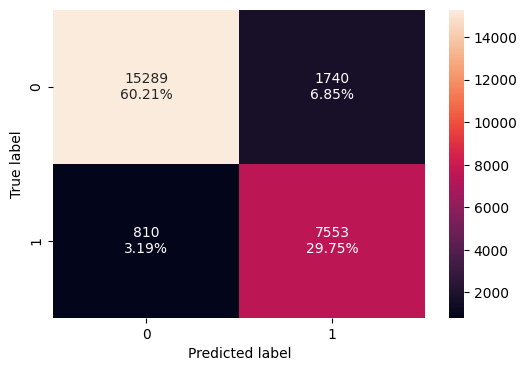

In [107]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [108]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Accuracy    Recall  Precision        F1
0  0.899575  0.903145   0.812762  0.855573

**Checking performance on test set**

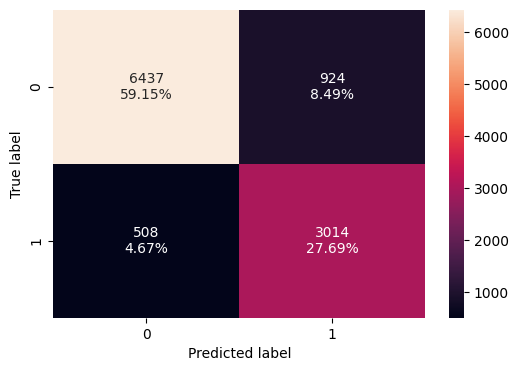

In [109]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [110]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_perf_test

Accuracy    Recall  Precision        F1
0  0.868419  0.855764   0.765363  0.808043

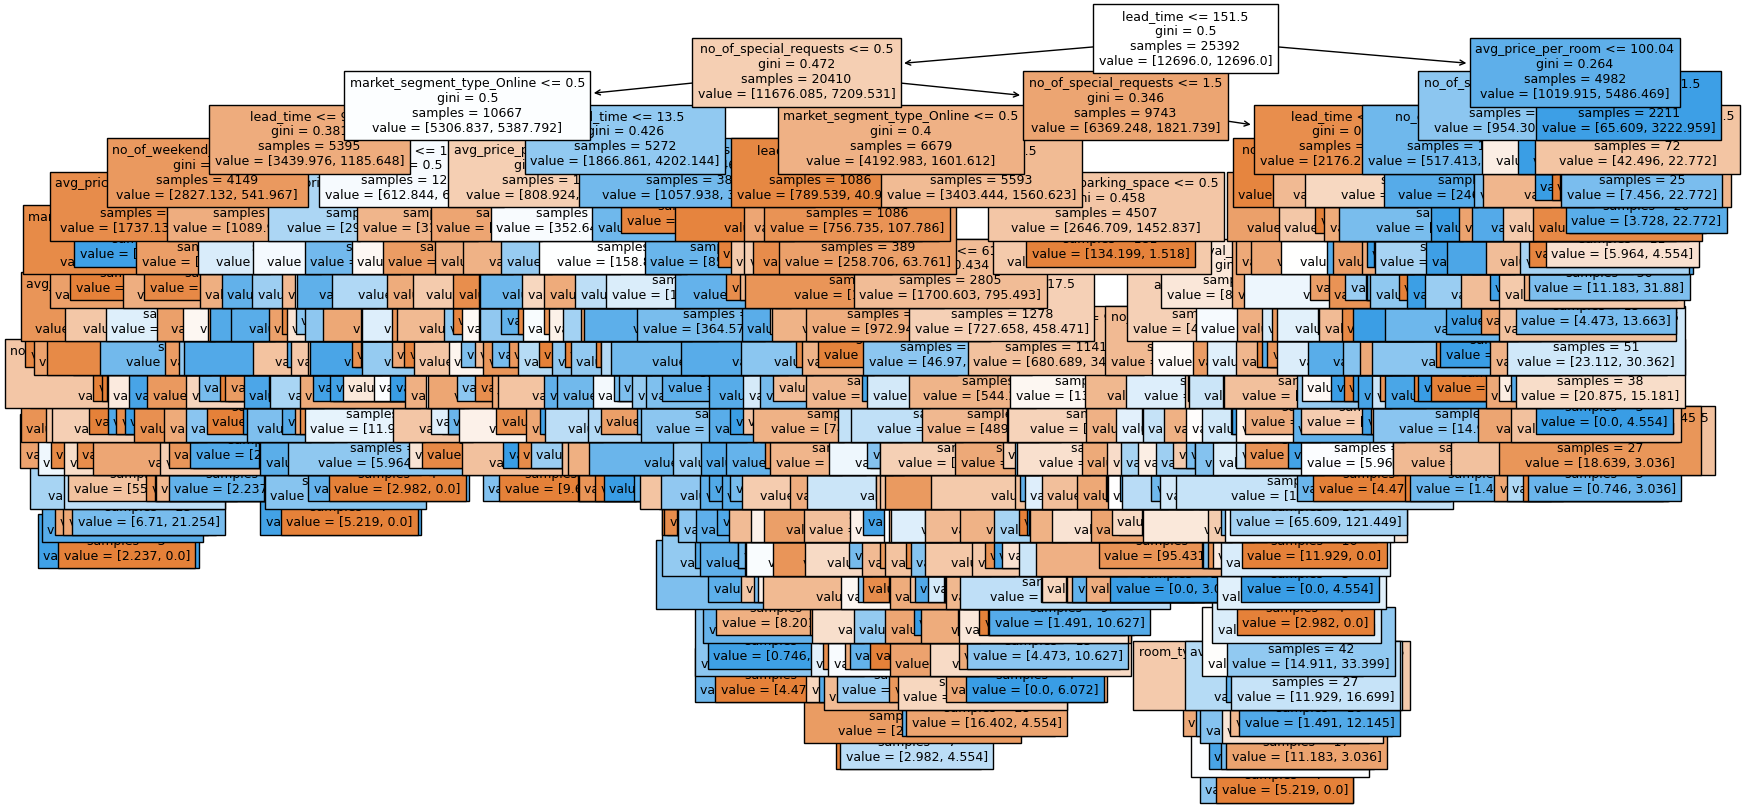

In [111]:
# plot decision tree
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [112]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

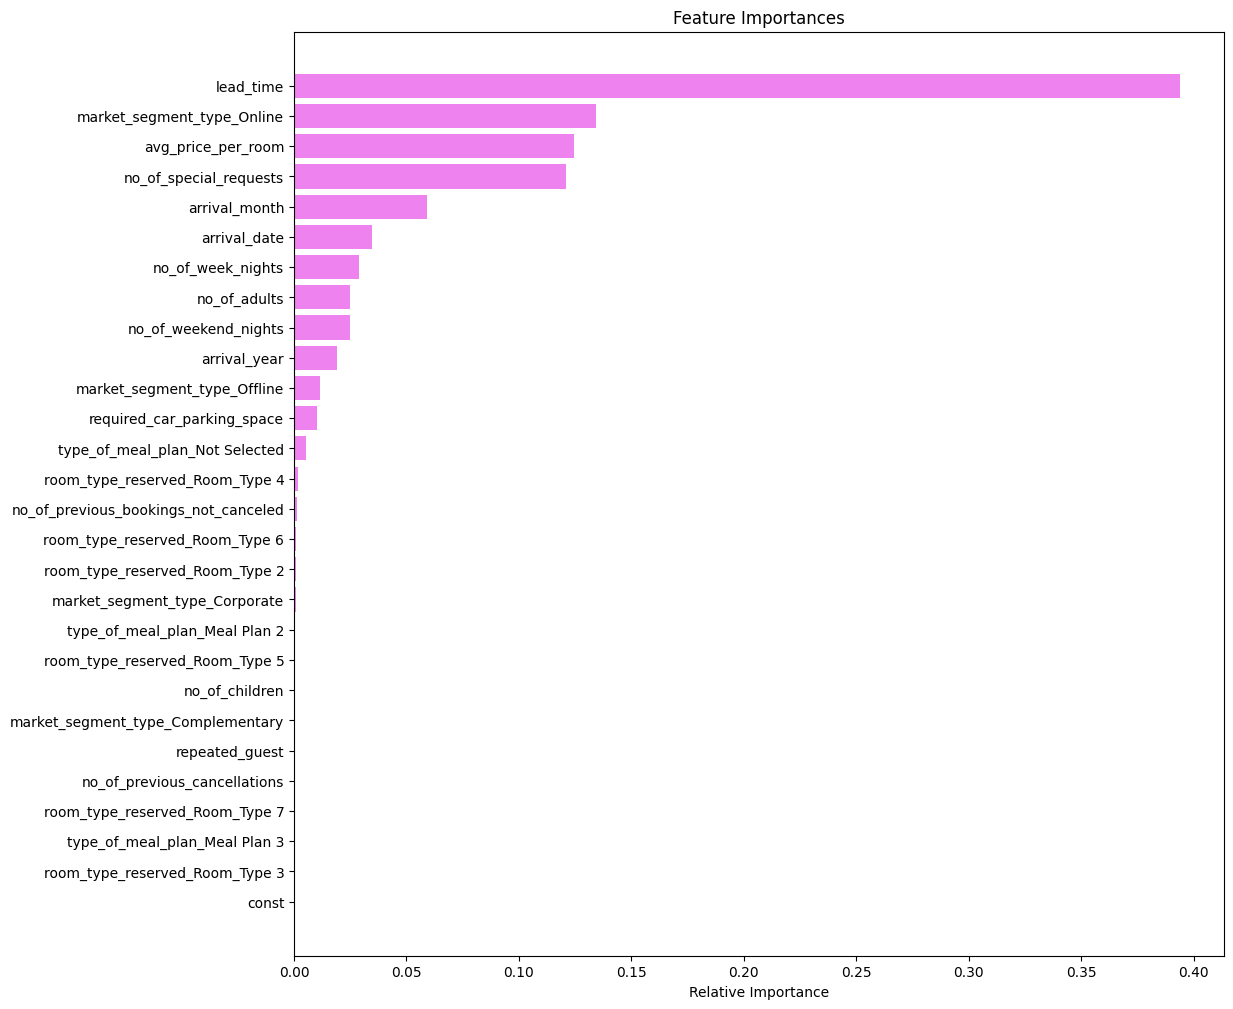

In [113]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Comparing decision tree models**

In [114]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.994211                     0.831010   
Recall                  0.986608                     0.786201   
Precision               0.995776                     0.724278   
F1                      0.991171                     0.753971   

           Decision Tree (Post-Pruning)  
Accuracy                       0.899575  
Recall                         0.903145  
Precision                      0.812762  
F1                             0.855573

In [115]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.874299                     0.834972   
Recall                  0.814026                     0.783362   
Precision               0.800838                     0.727584   
F1                      0.807378                     0.754444   

           Decision Tree (Post-Pruning)  
Accuracy                       0.868419  
Recall                         0.855764  
Precision                      0.765363  
F1                             0.808043

## Actionable Insights and Recommendations

* Only 1.72% of repeat guests cancel bookings. Look to adopt some sort of loyalty program to retain guests and encourage repeat bookings.
* Lead time was the biggest indicator of cancellations. Look to increase the advanced notice required to cancel bookings when there are large lead times (> 150 days) to allow hotel more time to handle potential cancellations.
* Look to increase cancellation notice policy for rooms that cost greater than 100 euro per night.
* Bookings that required parking spaces or had special requests largely decreased the odds of cancellations. Reward guests with bookings with special requests to incentivize them to return, as they bring in more profit for the hotel.